In [ ]:
!pip install imutils

In [ ]:

from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
# define the dictionary of digit segments so we can identify
# each digit on the thermostat
DIGITS_LOOKUP = {
	(1, 1, 1, 0, 1, 1, 1): 0,
	(0, 0, 1, 0, 0, 1, 0): 1,
	(1, 0, 1, 1, 1, 1, 0): 2,
	(1, 0, 1, 1, 0, 1, 1): 3,
	(0, 1, 1, 1, 0, 1, 0): 4,
	(1, 1, 0, 1, 0, 1, 1): 5,
	(1, 1, 0, 1, 1, 1, 1): 6,
	(1, 0, 1, 0, 0, 1, 0): 7,
	(1, 1, 1, 1, 1, 1, 1): 8,
	(1, 1, 1, 1, 0, 1, 1): 9
}

In [ ]:
# load the example image
import cv2
image = cv2.imread("/content/Queen-Mary-Map.PNG")
# pre-process the image by resizing it, converting it to
# graycale, blurring it, and computing an edge map
print(image.shape)
print(image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 200, 255)

(776, 1080, 3)
(776, 1080, 3)


In [ ]:
image.shape

(776, 1080, 3)

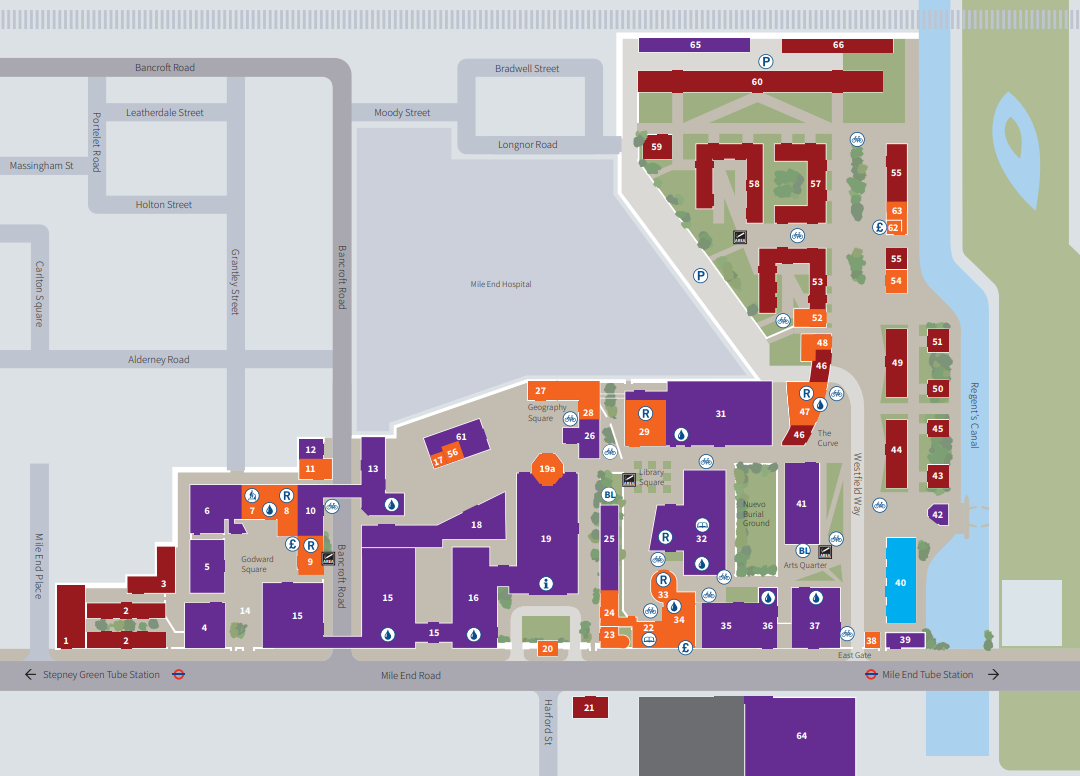

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
import cv2
def x_func(x,y):
# load the example image
  image = cv2.imread("/content/Queen-Mary-Map.PNG")
# pre-process the image by resizing it, converting it to
# graycale, blurring it, and computing an edge map
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  edged = cv2.Canny(blurred, 50, 200, 255)
  image_1 = cv2.circle(image, (x,y), radius=2, color=(0, 0, 255), thickness=10)
  cv2_imshow(image_1)

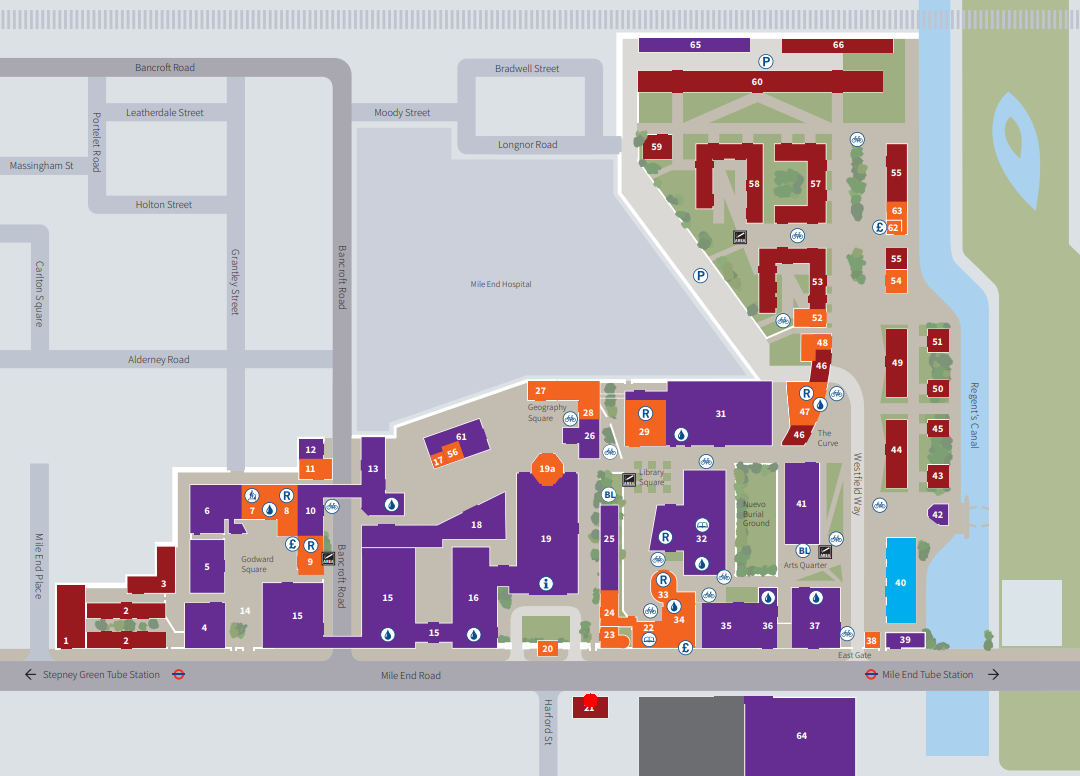

In [ ]:
y = 700
x = 590

x_func(x,y)

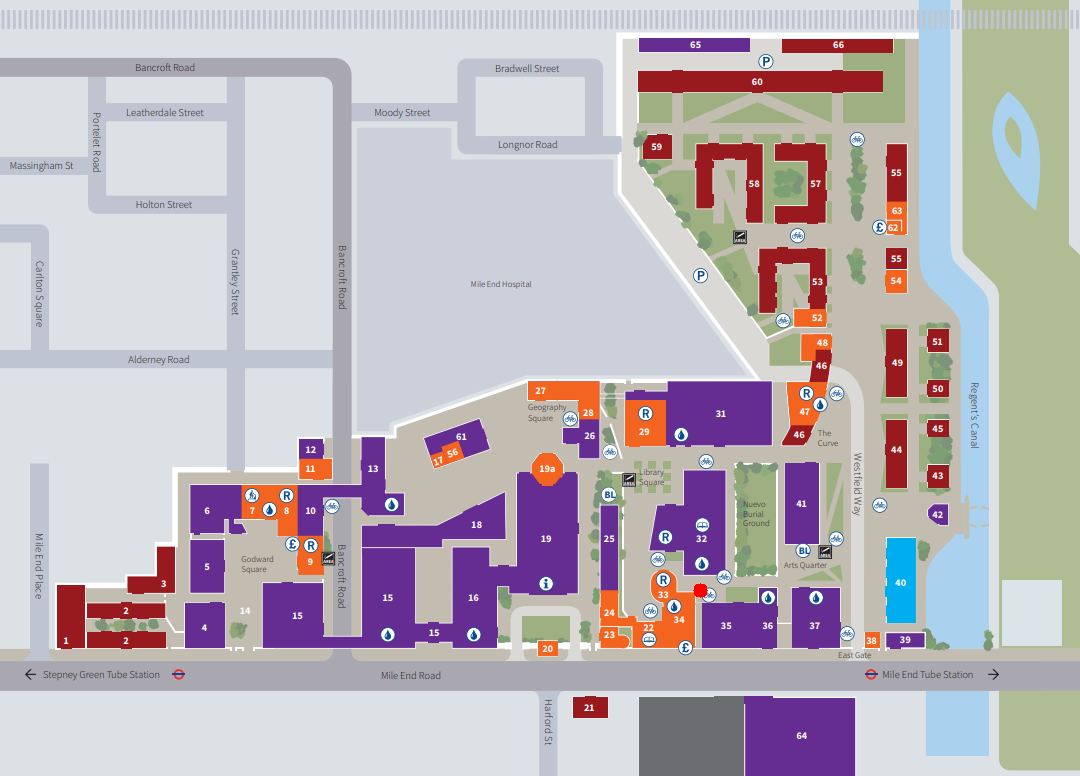

In [ ]:
y = 590
x = 700

x_func(x,y)

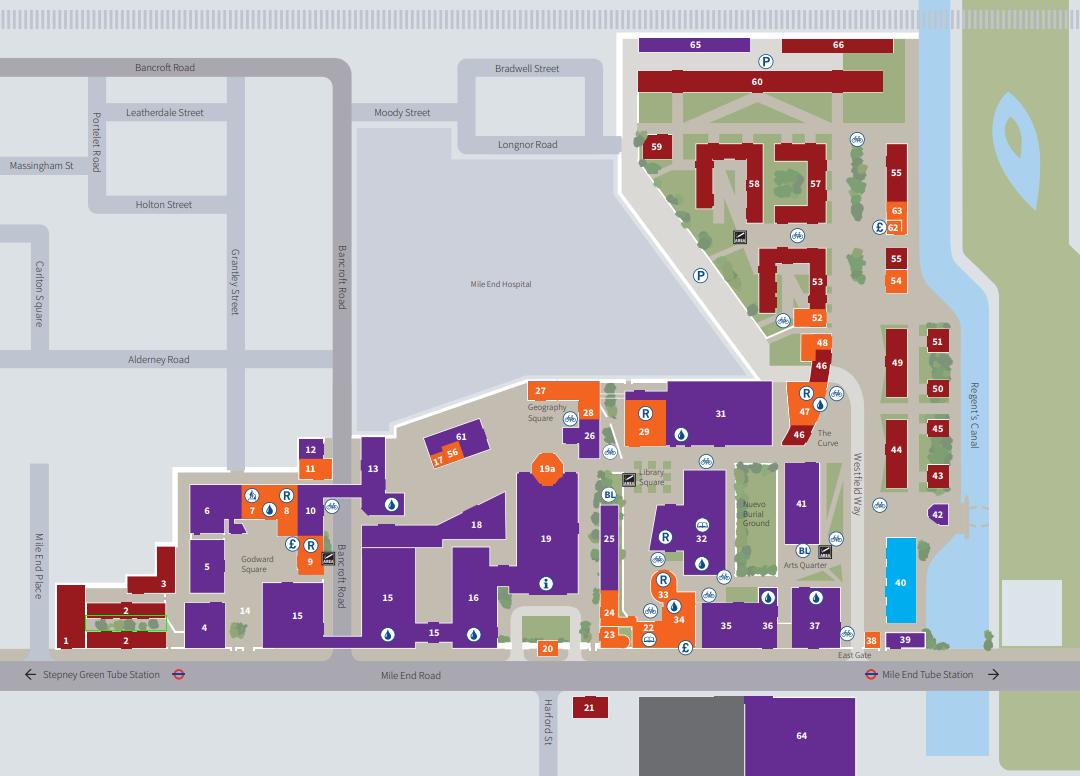

In [ ]:
image = cv2.imread("/content/Queen-Mary-Map.PNG")
image_1 = cv2.rectangle(image,(85,615),(166,630),[0,255,0],1)
cv2_imshow(image_1)

In [ ]:
image = cv2.imread("/content/Queen-Mary-Map.PNG")

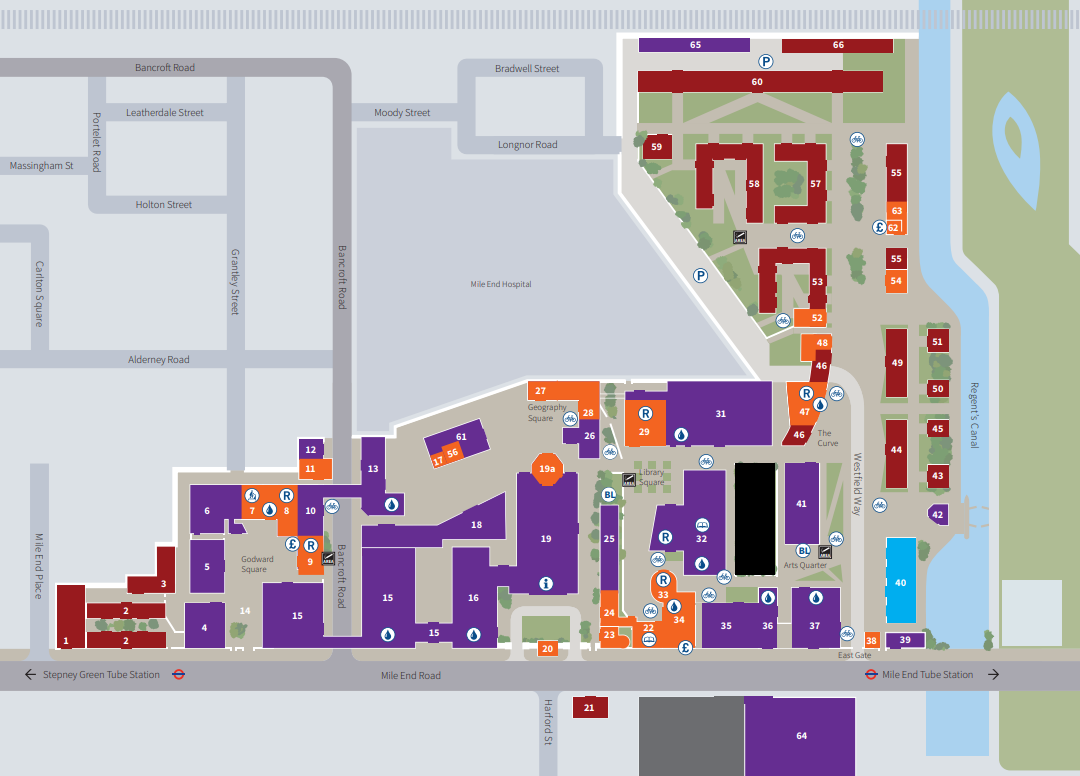

In [ ]:
image[463:575,735:775] = [0,0,0]
cv2_imshow(image)

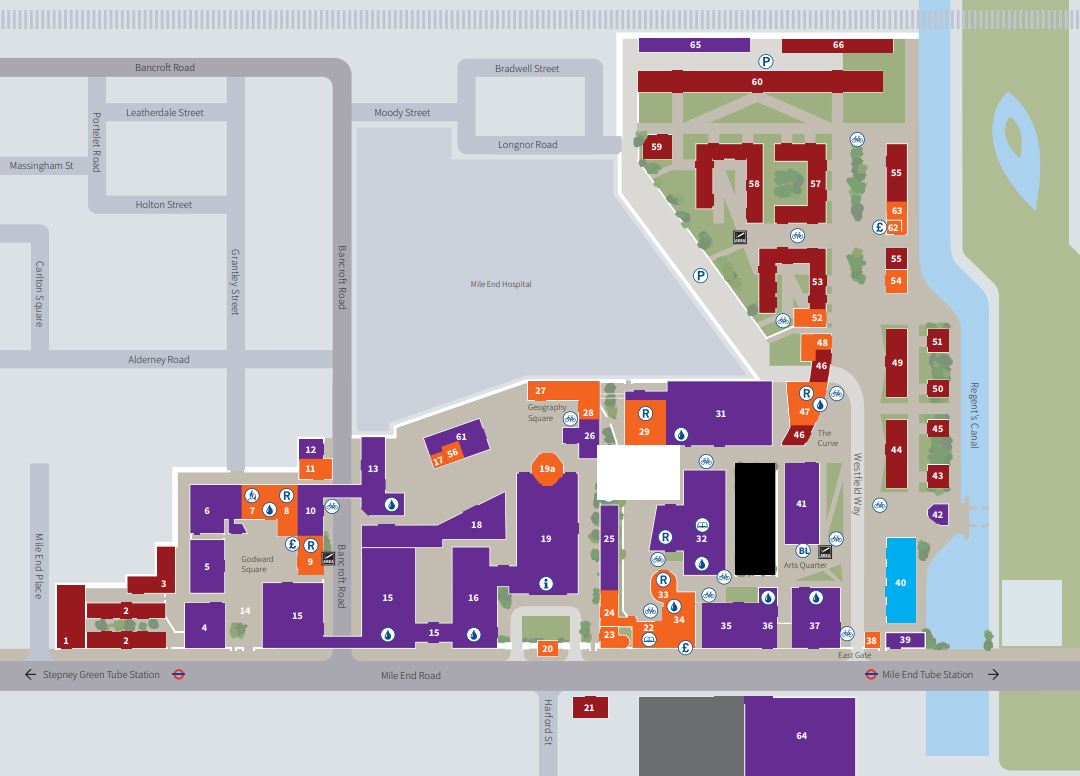

In [ ]:
image[445:500,597:680] = [255,255,255]
cv2_imshow(image)

In [ ]:
image[657:690,15:1025] = [176, 168, 169]

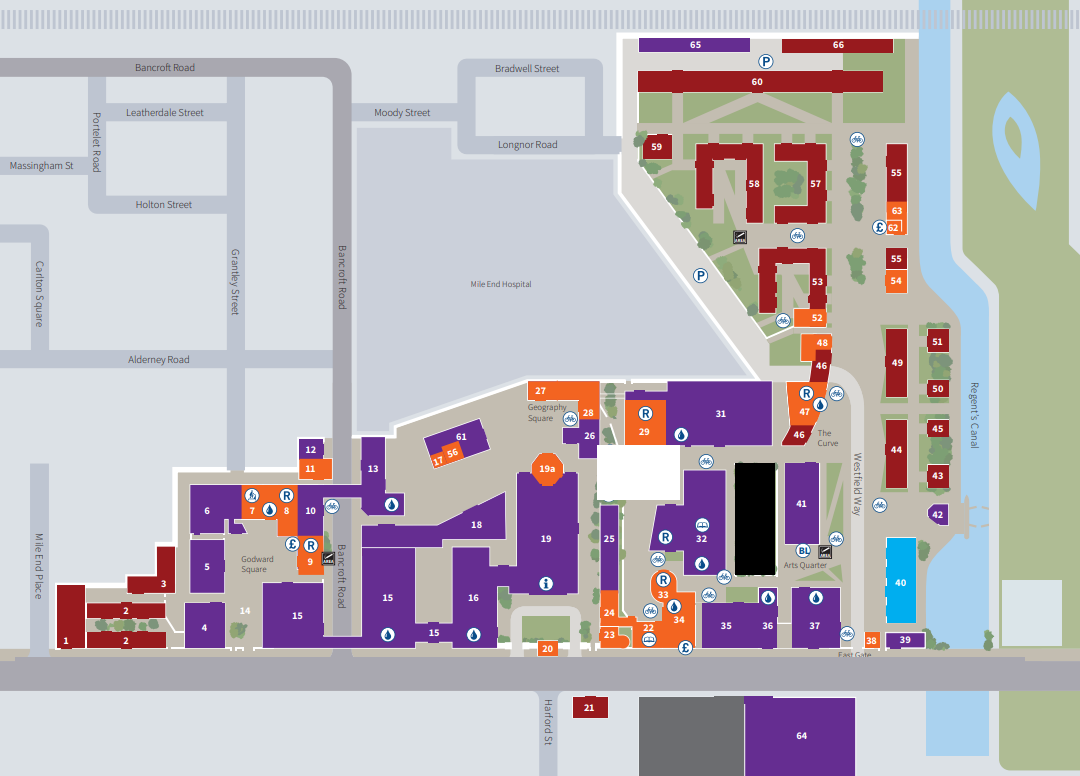

In [ ]:
cv2_imshow(image)

In [ ]:
image[157:673,330:356] = 176, 168, 169

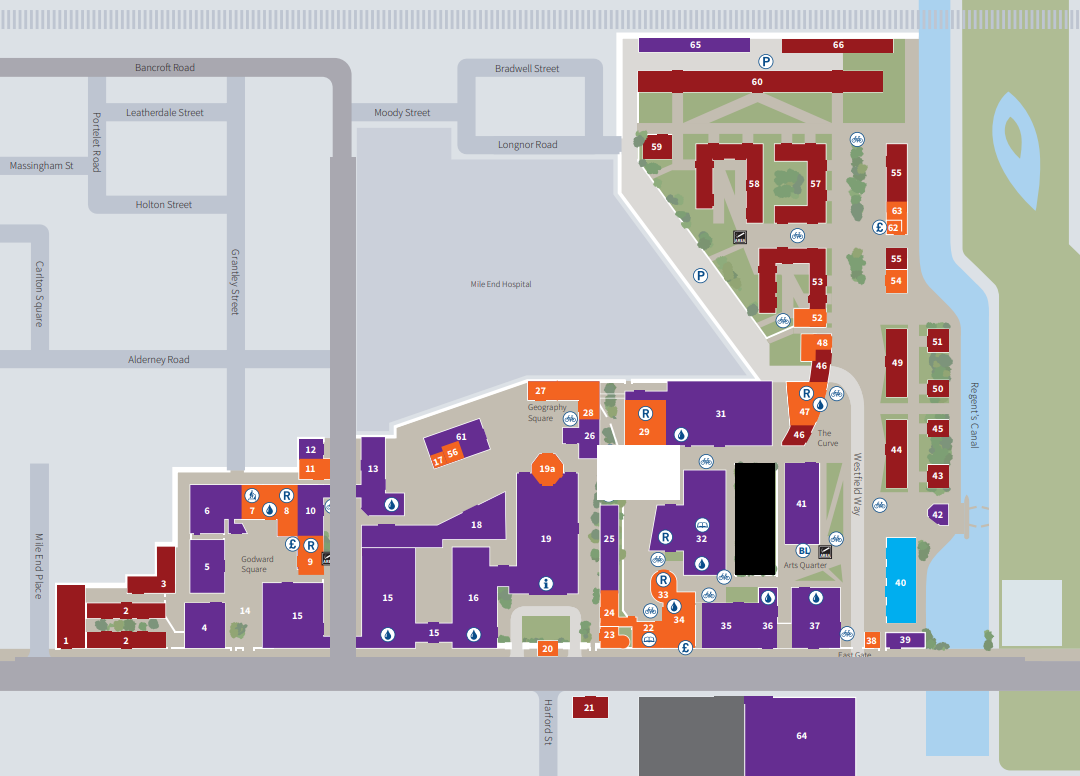

In [ ]:
cv2_imshow(image)

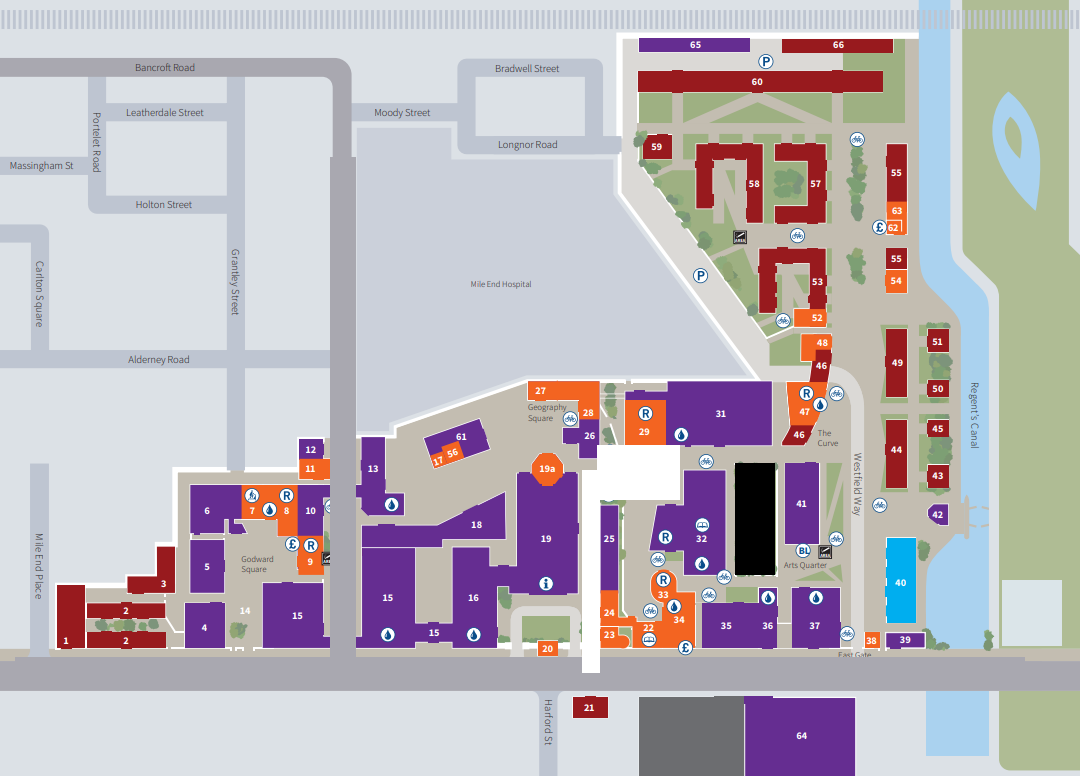

In [ ]:
image[470:673,582:600] = [255,255,255]
cv2_imshow(image)

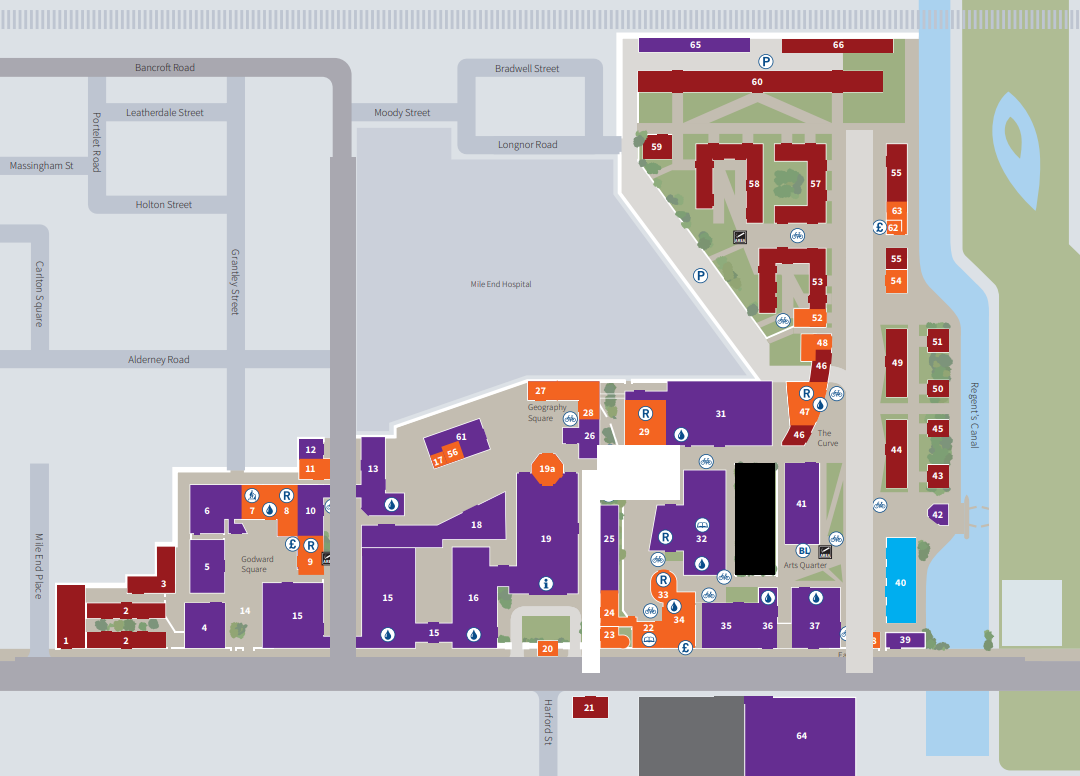

In [ ]:
image[130:673, 846:873] = [214, 217, 219]
cv2_imshow(image)

In [ ]:
cv2_imshow(image[450:470,696:716])

In [ ]:
cv2.imwrite('circlular_patch.png',image[450:470,696:716])

True

In [ ]:
output = image[450:470,696:716,1]

In [ ]:
circles = cv2.HoughCircles(image[450:470,696:716,1], cv2.HOUGH_GRADIENT, minDist=8,
                           dp=1,
                           param1=150,
                           param2=12,
                           minRadius=4,
                           maxRadius=10)

In [ ]:
circles

array([[[ 9.5, 11.5,  6. ]]], dtype=float32)

In [ ]:
import numpy as np
circles = np.round(circles[0, :]).astype("int")
for (x, y, r) in circles:
        cv2.circle(output, (int(x),  int(y)), r, (0, 255, 0), 1)
cv2_imshow(output)

In [ ]:
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
from tqdm import tqdm
import numpy as np
for i in tqdm(range(0,image.shape[0]-20,2)):
  for j in range(0,image.shape[1]-20,2):
    img_1 = image[i:i+20,j:j+20]
    gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, minDist=8,
                           dp=1,
                           param1=150,
                           param2=12,
                           minRadius=4,
                           maxRadius=10)
    
    if circles is not None:
      circles = np.round(circles[0, :]).astype("int")
      for (x, y, r) in circles:
        cv2.circle(output, (j + int(x), i + int(y)), r, (0, 255, 0), 1)

100%|██████████| 378/378 [00:06<00:00, 57.42it/s]


In [ ]:
from tqdm import tqdm
circles_position = []
for i in tqdm(range(0,image.shape[0]-20,2)):
  for j in range(0,image.shape[1]-20,2):
    img_1 = image[i:i+20,j:j+20]
    gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, minDist=8,
                           dp=1,
                           param1=150,
                           param2=12,
                           minRadius=4,
                           maxRadius=10)
    
    if circles is not None:
      circles = np.round(circles[0, :]).astype("int")
      (x,y,r) = circles[0]
      
      cv2.circle(output, (j + int(x), i + int(y)), r, (0, 255, 0), 1)
      circles_position.append([j + int(x), i + int(y), r])

100%|██████████| 378/378 [00:06<00:00, 56.68it/s]


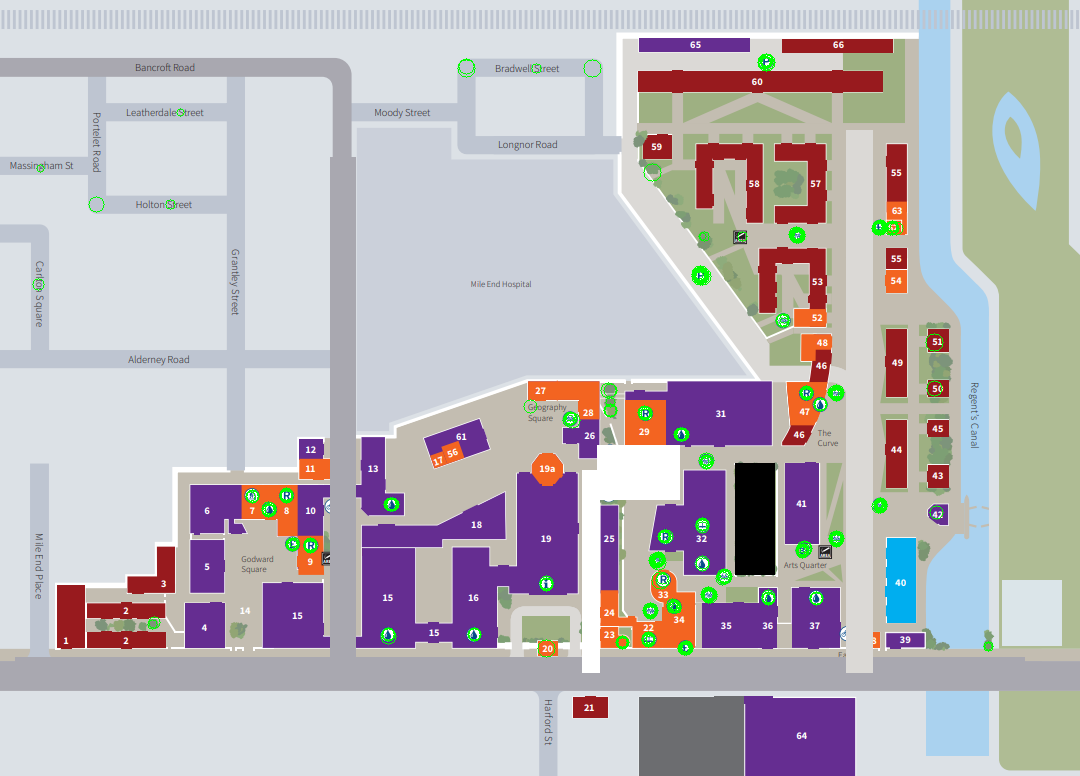

In [ ]:
cv2_imshow(output)

In [ ]:
cv2.imwrite('image_circluar_patches.png',output)

True

In [ ]:
image_1 = np.zeros((image.shape[0],image.shape[1],3))

In [ ]:
image_1.shape

(776, 1080, 3)

In [ ]:
bg = np.array([177,189,195])
bg_1 = np.array([176, 168, 169])
bg_2 =  np.array([214, 217, 219])
bg_3 = np.array([218, 208, 203])
bg_4 = np.array([255,255,255])
bg_5 = np.array([255, 255, 25])
bg_7 = np.array([148, 188, 175])
bg_6 = np.array([130, 176, 158])
bg_8 = np.array([176,188,194])
bg_9 = np.array([166,186,186])

In [ ]:
for i in range(image.shape[0]-1):
  for j in range(image.shape[1]-1):
    if (image[i,j] == bg).all():
      image_1[i,j] = 256
    if (image[i,j] == bg_1).all():
        image_1[i,j] = 256
    if (image[i,j] == bg_2).all():
        image_1[i,j] = 256
    if (image[i,j] == bg_3).all():
        image_1[i,j] = 256
    if (image[i,j] == bg_4).all():
        image_1[i,j] = 256
    if (image[i,j] == bg_5).all():
        image_1[i,j] = 256
    if (image[i,j] == bg_7).all():
        image_1[i,j] = 256
    if (image[i,j] == bg_6).all():
        image_1[i,j] = 256
    if (image[i,j] == bg_8).all():
        image_1[i,j] = 256
    if (image[i,j] == bg_9).all():
        image_1[i,j] = 256

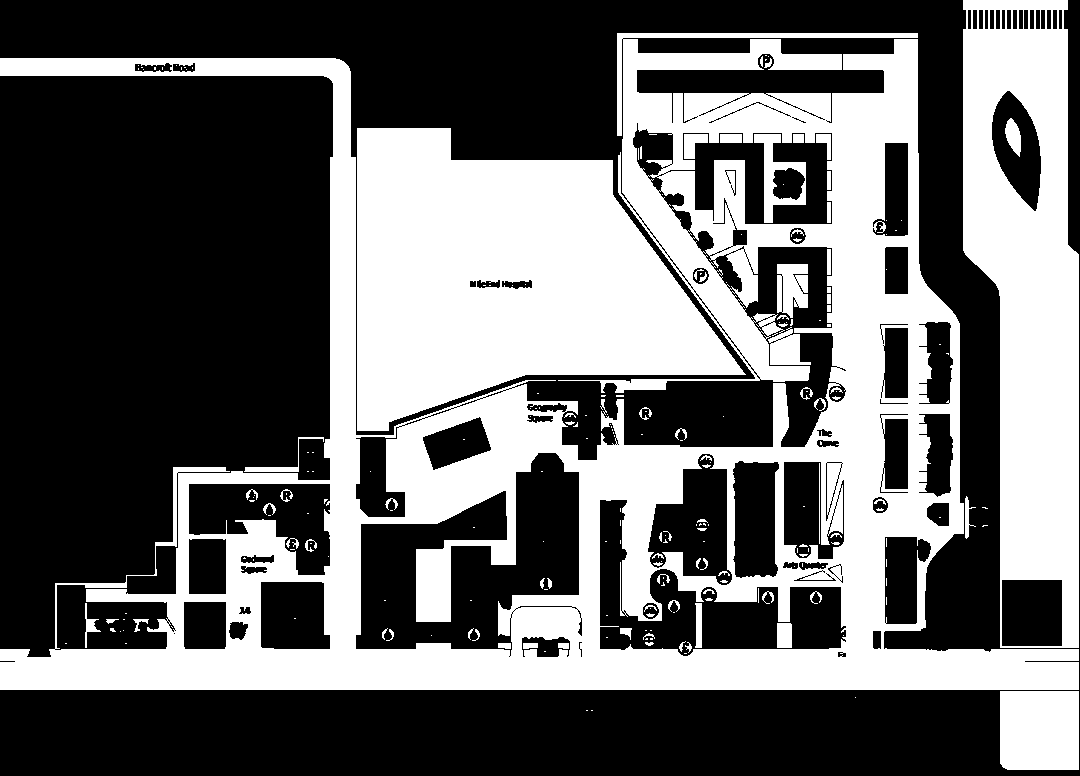

In [ ]:
cv2_imshow(image_1)

In [ ]:
cv2.imwrite('segmented_output.png', image_1)

True

In [ ]:
n = 1
for i in circles_position:
  a,b,c = i
  if (image_1[int(b+n*c),int(a+n*c)] == np.array([256,256,256])).all():

    for j in range(c+1):
      for k in range(c+1):
        
          image_1[int(b+j),int(a+k)] = [255,255,255]
          image_1[int(b+j),int(a-k)] = [255,255,255]
          image_1[int(b+j),int(a)] = [255,255,255]
          image_1[int(b-j),int(a-k)] = [255,255,255]
          image_1[int(b-j),int(a+k)] = [255,255,255]
          image_1[int(b-j),int(a)] = [255,255,255]
          image_1[int(b),int(a+k)] = [255,255,255]
          image_1[int(b),int(a-k)] = [255,255,255]
          image_1[int(b),int(a)] = [255,255,255]

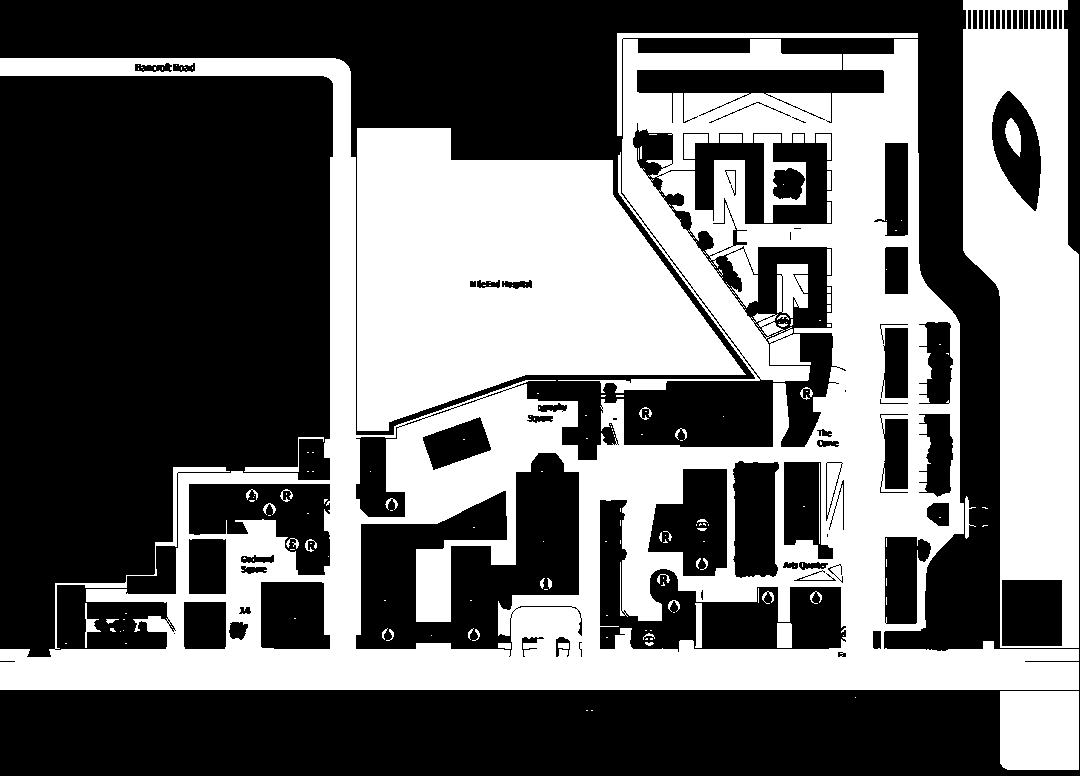

In [ ]:
cv2_imshow(image_1)

In [ ]:
image_1.shape

(776, 1080, 3)

In [ ]:
import cv2
import numpy as np

kernel = np.ones((4,4),np.uint8)
erosion = cv2.erode(image_1,kernel,iterations = 1)

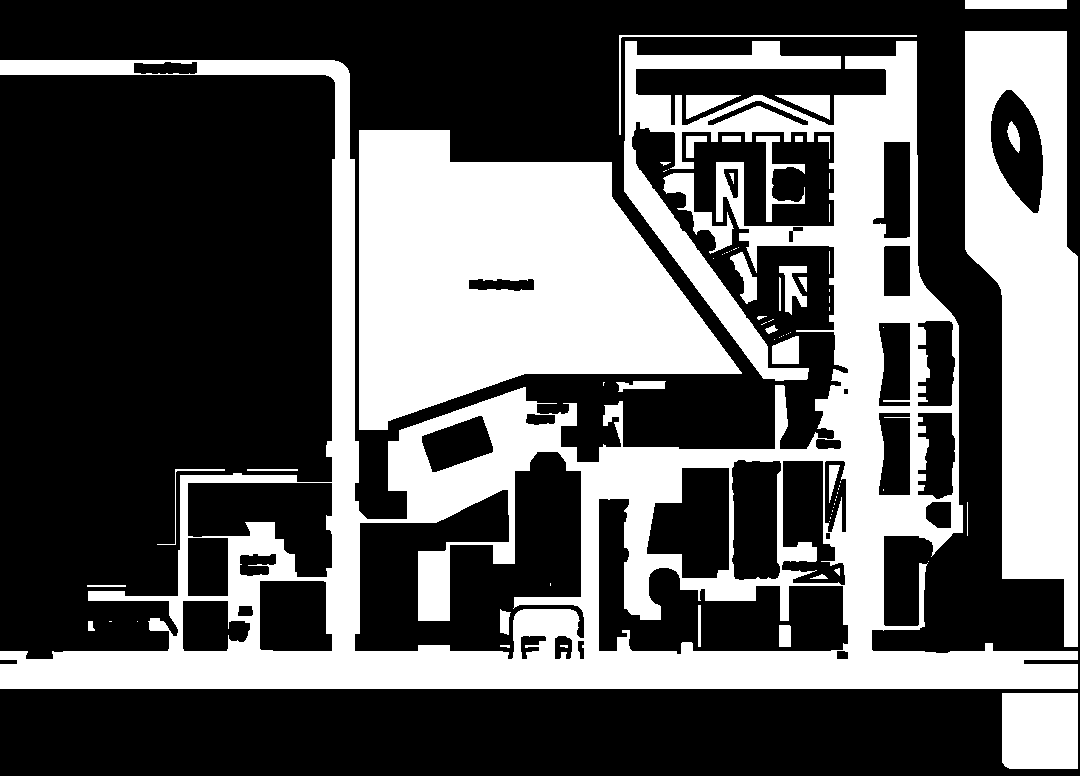

In [ ]:
cv2_imshow(erosion)

In [ ]:
dilation = cv2.dilate(erosion,kernel,iterations = 1)

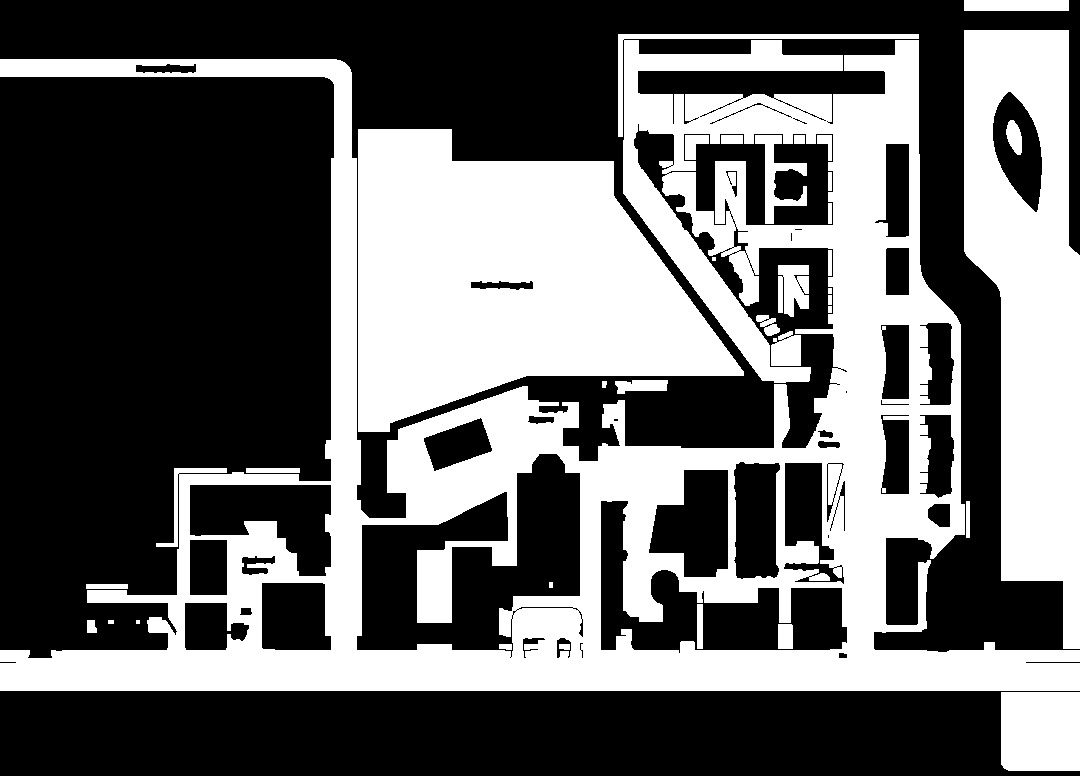

In [ ]:
cv2_imshow(dilation)

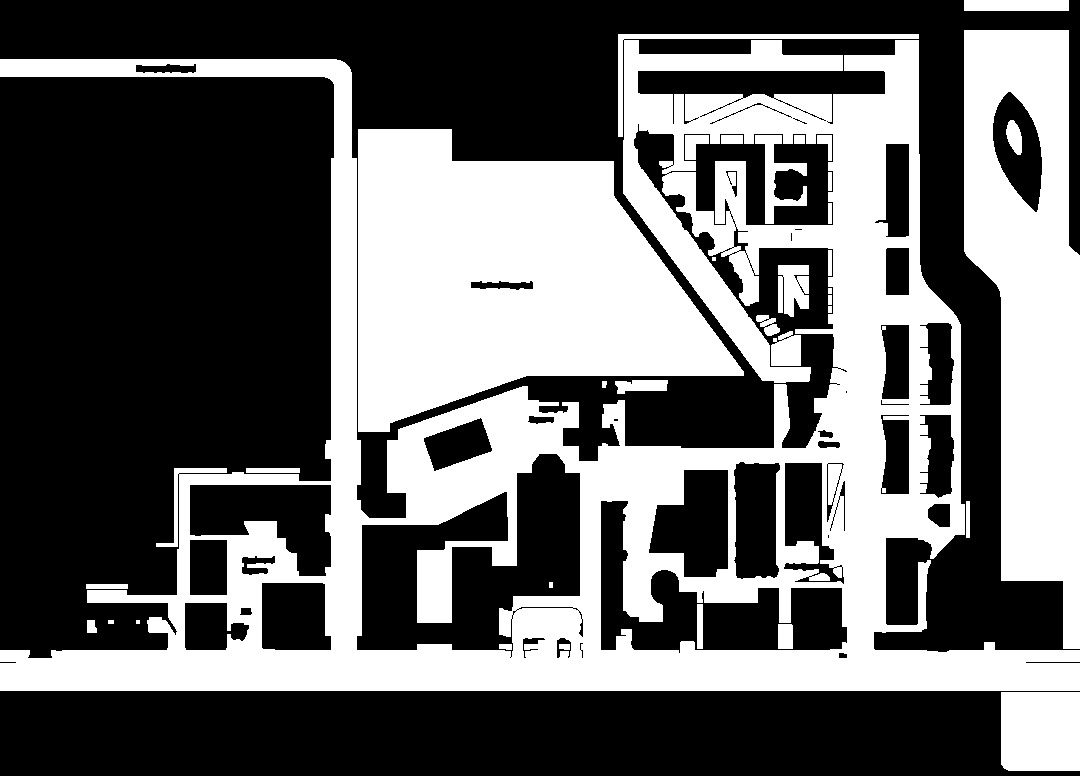

In [ ]:
cv2_imshow(dilation)

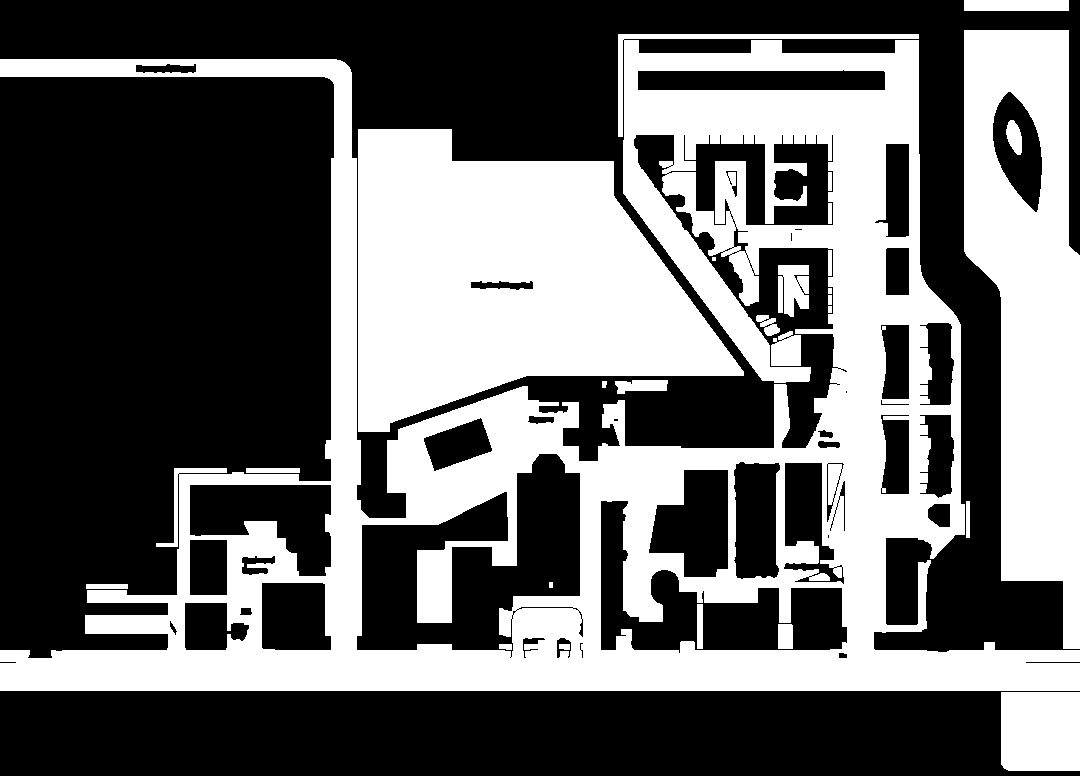

In [ ]:
dilation_1 =  dilation[:,:,1]
dilation_1[90:135,635:907] = 256
dilation_1[53:70,635:907]  = 256
dilation_1[615:634,85:170] = 256
cv2_imshow(dilation_1)

In [ ]:
cv2.imwrite('final_output.png',dilation_1)

True

In [ ]:
dilated_image = 1- dilation_1

In [ ]:
new_image  = np.zeros((image.shape[0],image.shape[1]))

In [ ]:
for i in range(dilation_1.shape[0]):
  for j in range(dilation_1.shape[1]):

    if (dilation_1[i,j]) == 256 or (dilation_1[i,j]) == 255:
      new_image[i,j] = 0
    else:
      new_image[i,j] = 1

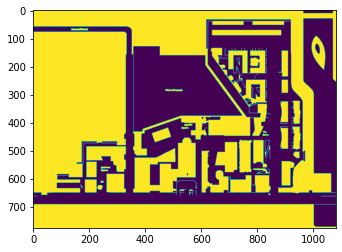

In [ ]:
from matplotlib import pylab as plt

plt.imshow(new_image)

In [ ]:
list_map = []
for i in range(dilation_1.shape[0]):
  list_map.append(list(dilation_1[i]))

In [ ]:
new_image[70]

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
new_image = new_image.astype(int)

In [ ]:
dilation_1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(list_map[0])

1080

In [ ]:
new_image.shape

(776, 1080)

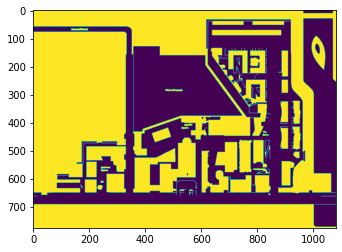

In [ ]:
plt.imshow(new_image)

In [ ]:
new_image[38,840]

0

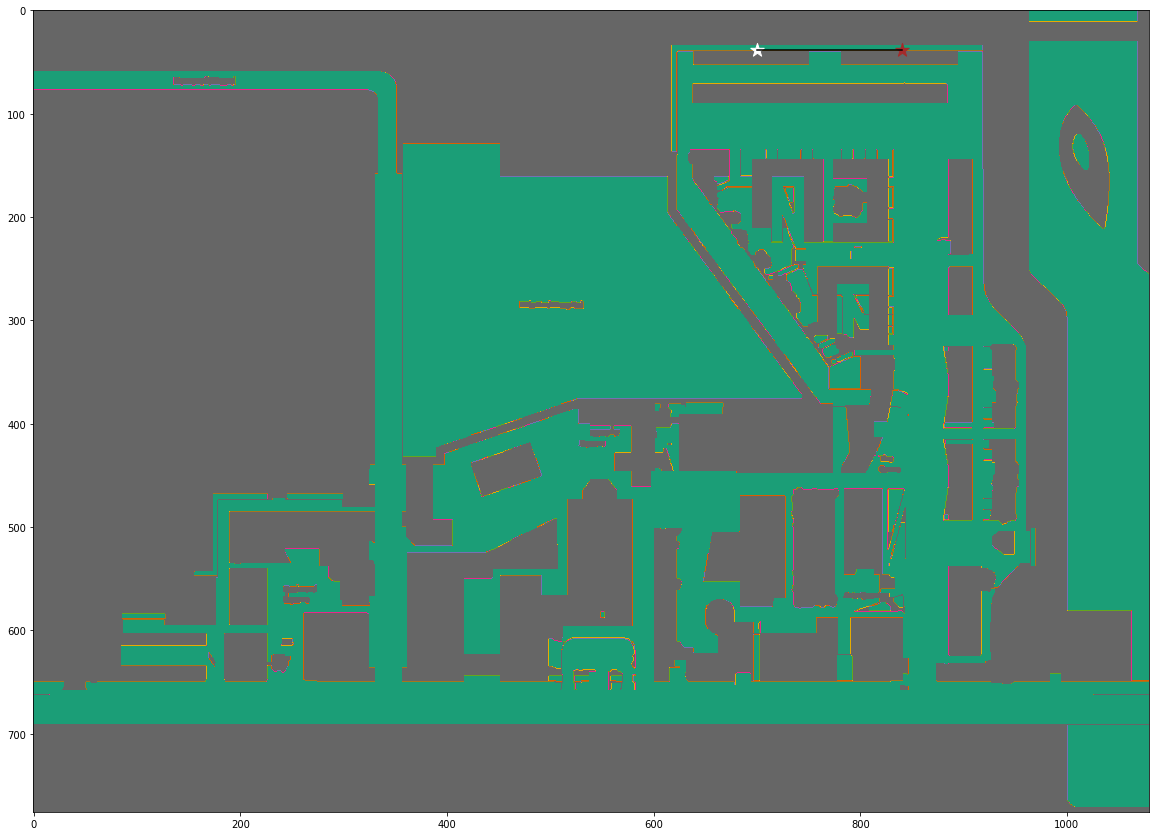

In [ ]:
##############################################################################
# import packages
##############################################################################
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
##############################################################################
# plot grid
##############################################################################
grid = new_image
# start point and goal
start = (38,840)
goal = (38,700)
#start = (680,20)
#goal = (600,190)
##############################################################################
# heuristic function for path scoring
##############################################################################
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)
##############################################################################
# path finding function
##############################################################################
def astar(array, start, goal):
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))
    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data
        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
    return False

route = astar(grid, start, goal)
route = route + [start]
route = route[::-1]

##############################################################################
# plot the path
##############################################################################
#extract x and y coordinates from route list
x_coords = []

y_coords = []

for i in (range(0,len(route))):

    x = route[i][0]

    y = route[i][1]

    x_coords.append(x)

    y_coords.append(y)

# plot map and path

fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(grid, cmap=plt.cm.Dark2)

ax.scatter(start[1],start[0], marker = "*", color = "brown", s = 200)

ax.scatter(goal[1],goal[0], marker = "*", color = "white", s = 200)

ax.plot(y_coords,x_coords, color = "black")

plt.show()

In [ ]:
image_1 = np.zeros((image.shape[0],image.shape[1],3))

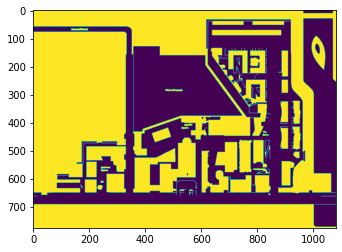

In [ ]:
plt.imshow(new_image)

In [ ]:
zero_3  = np.zeros((5,5))

In [ ]:
def nn_xy(x,y):
  nearest_neighbour = []
  for i in range(1,30):
    for j in range(1,30):
      k = new_image[x+i,y+j]
      if (k==0) and (new_image[x+i-2:x+i+3,y+j-2:y+j+3] == zero_3).all():
        
        nearest_neighbour.append([x+i,y+j])
        break
      k_1 = new_image[x-i,y+j]
      if k_1==0 and (new_image[x-i-2:x-i+3,y+j-2:y+j+3] == zero_3).all():
        nearest_neighbour.append([x-i,y+j])
        break
      k_2 = new_image[x+i,y-j]
      if k_2==0 and (new_image[x+i-2:x+i+3,y-j-2:y-j+3] == zero_3).all():
        nearest_neighbour.append([x+i,y-j])
        break
      k_3 = new_image[x-i,y-j]
      if k_3==0 and (new_image[x-i-2:x-i+3,y-j-2:y-j+3] == zero_3).all():
        nearest_neighbour.append([x-i,y-j])
        break
      k_4 = new_image[x,y+j]
      if k_4==0 and (new_image[x-2:x+3,y+j-2:y+j+3] == zero_3).all():
        nearest_neighbour.append([x,y+j])
        break
      k_5 = new_image[x,y-j]
      if k_5==0 and (new_image[x-2:x+3,y-j-2:y-j+3] == zero_3).all():
        nearest_neighbour.append([x,y-j])
        break
      k_6 = new_image[x+i,y]
      if k_6==0 and (new_image[x+i-2:x+i+3,y-2:y+3] == zero_3).all():
        nearest_neighbour.append([x+i,y])
        break
      k_7 = new_image[x-i,y]
      if k_7==0 and (new_image[x-i-2:x-i+3,y-2:y+3] == zero_3).all():
        nearest_neighbour.append([x-i,y])
        break
        

  return nearest_neighbour

In [ ]:
! pip install pathfinding

In [ ]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid

In [ ]:
matrix = new_image

In [ ]:
new_image_1 = np.abs(1-new_image)

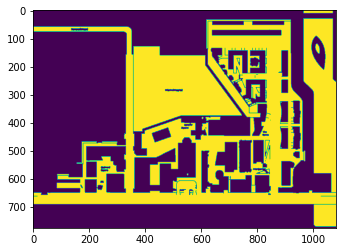

In [ ]:
plt.imshow(new_image_1)

In [ ]:
dict_1 = {}
dict_1["66"] = [840,45]
dict_1["65"] = [700,45]
dict_1["60"] = [755,80]
dict_1["48"] = [825,340]
dict_1["52"] = [815,325]
dict_1["53"] = [815,280]
dict_1["59"] = [655,150]
dict_1["58"] = [755,180]
dict_1["57"] = [815,180]
dict_1["55"] = [895,170]
dict_1["63"] = [895,215]
dict_1["62"] = [895,225]
dict_1["55"] = [895,260]
dict_1["54"] = [895,280]
dict_1["42"] = [935,520]
dict_1["43"] = [935,480]
dict_1["45"] =  [935,420]
dict_1["50"] = [935,380]
dict_1["51"] = [935,350]
dict_1["49"] = [895,355]
dict_1["44"] = [895,455]
dict_1["1"] = [70,625]
dict_1['2'] = [125,640]
dict_1['3'] = [165,585]
dict_1["4"] = [205,625]
dict_1['5'] = [205,565]
dict_1["6"] = [205,510]
dict_1["7"] = [250,510]
dict_1["8"] = [285,510]
dict_1["10"] = [310,510]
dict_1["9"] = [310,560]
dict_1["15"] = [298,615]
dict_1["12"] = [310,450]
dict_1["11"] = [310,470]
dict_1["13"] = [368,470]
dict_1["15"] = [390,600]
dict_1["16"] = [475,600]
dict_1["18"] = [475,525]
dict_1["17"] = [440,460]
dict_1["56"] = [455,455]
dict_1["61"] = [465,440]
dict_1["19"] = [550,540]
dict_1["19a"] = [550,465]
dict_1["20"] = [550,650]
dict_1["27"] = [540,390]
dict_1["28"] = [590,410]
dict_1["26"] = [590,440]
dict_1["25"]   = [610,540]
dict_1["24"] = [610,610]
dict_1["23"] = [610,635]
dict_1["22"] = [650,630]
dict_1["34"] = [680,625]
dict_1["33"] = [665,600]
dict_1["32"] = [700,540]
dict_1["29"] = [640,435]
dict_1["31"] = [720,415]
dict_1["21"] = [590,700]
dict_1["64"] = [790,700]
dict_1["35"] = [725, 620]
dict_1["36"] = [765,620]
dict_1["37"] = [810,620]
dict_1["41"] = [810,500]
dict_1["46"] = [800,440]
dict_1["47"] = [800,410]
dict_1["39"] = [900,645]
dict_1["38"] = [870,645]
dict_1["40"] = [900,585]

In [ ]:
x,y = dict_1['19']
dict_nn['19'] = (x+32,y)
#
x,y = dict_1['22']
dict_nn['22'] = (x,y-13)
#
x,y = dict_1['35']
dict_nn['35'] = (x,y-20)
#
x,y = dict_1['36']
dict_nn['36'] = (x+18,y-3)
#
x,y = dict_1['37']
dict_nn['37'] = (x-20,y-5)
#
x,y = dict_1['46']
dict_nn['46'] = (x+13,y)
#
dict_nn['46'] = dict_nn['47']
#
x,y = dict_1['52']
dict_nn['52'] = (x+18,y)
#
x,y = dict_1['53']
dict_nn['53'] = (x+15,y)
#
x,y = dict_1['57']
dict_nn['57'] = (x+15,y)
#
x,y = dict_1['58']
dict_nn['58'] = (x+12,y-15)
#
x,y = dict_1['60']
dict_nn['60'] = (x,y+17)
#
x,y = dict_1['66']
dict_nn['66'] = (x+15,y+13)
# 
x,y = dict_1['66']
dict_nn['66'] = (x+15,y+13)
#
x,y = dict_1['65']
dict_nn['65'] = (x+15,y+13)

In [ ]:
import json

with open('locations_nn.json', 'w') as fp:
    json.dump(dict_nn, fp)

In [ ]:
import json

with open('locations_nn.json') as f:
  dict_nn = json.load(f)

In [ ]:
d_index = '1'
D = nn_xy(dict_nn[d_index][1],dict_nn[d_index][0])[0]
D

[627, 88]

In [ ]:
o_index = '36'
O  = nn_xy(dict_nn[o_index][1],dict_nn[o_index][0])[0]
O

[618, 784]

operations: 183346 path length: 956


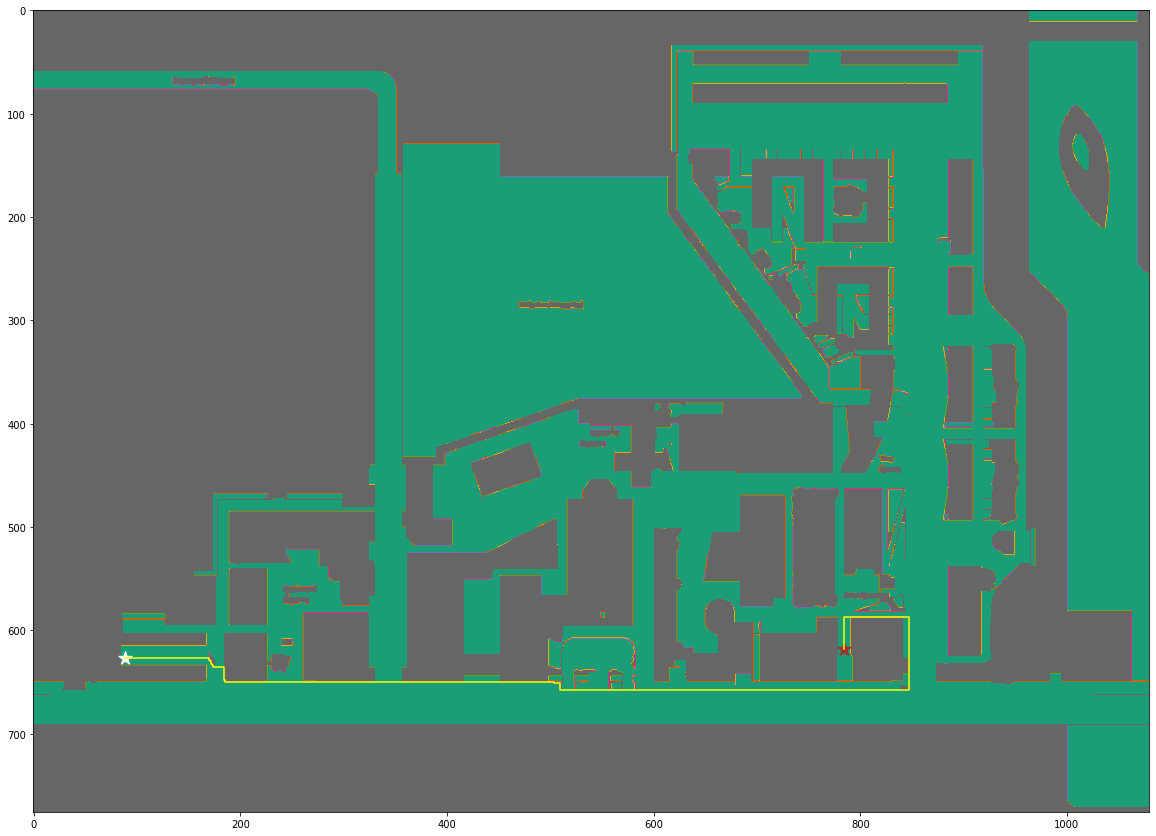

CPU times: user 4.34 s, sys: 35 ms, total: 4.38 s
Wall time: 4.38 s


In [ ]:
%%time
# https://github.com/brean/python-pathfinding
from pathfinding.finder.breadth_first import BreadthFirstFinder
grid = Grid(matrix=new_image_1)

start = grid.node(O[1],O[0])
end = grid.node(D[1],D[0])
finder = BreadthFirstFinder()
path, runs = finder.find_path(start, end, grid)

print('operations:', runs, 'path length:', len(path))

x_coords = []

y_coords = []

for i in (range(0,len(path))):

    x = path[i][1]

    y = path[i][0]

    x_coords.append(x)

    y_coords.append(y)

# plot map and path

fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(new_image, cmap=plt.cm.Dark2)

ax.scatter(O[1],O[0], marker = "*", color = "brown", s = 200)

ax.scatter(D[1],D[0],marker = "*", color = "white", s = 200)

ax.plot(y_coords,x_coords, color = "yellow")

plt.show()

operations: 30093 path length: 768


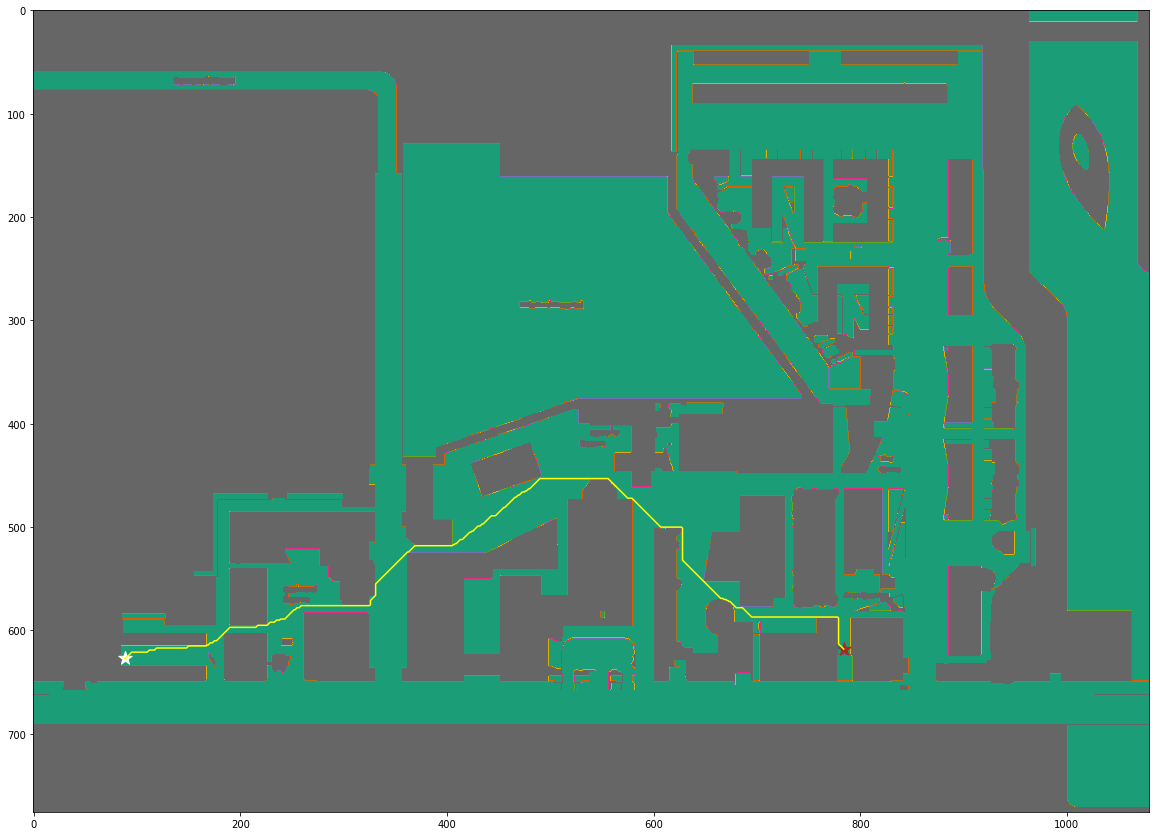

CPU times: user 7 s, sys: 99.1 ms, total: 7.1 s
Wall time: 7.12 s


In [ ]:
%%time
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder
# https://github.com/brean/python-pathfinding
from pathfinding.finder.breadth_first import BreadthFirstFinder
grid = Grid(matrix=new_image_1)

start = grid.node(O[1],O[0])
end = grid.node(D[1],D[0])
finder = AStarFinder(diagonal_movement=DiagonalMovement.always)
path, runs = finder.find_path(start, end, grid)

print('operations:', runs, 'path length:', len(path))

x_coords = []

y_coords = []

for i in (range(0,len(path))):

    x = path[i][1]

    y = path[i][0]

    x_coords.append(x)

    y_coords.append(y)

# plot map and path

fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(new_image, cmap=plt.cm.Dark2)

ax.scatter(O[1],O[0], marker = "*", color = "brown", s = 200)

ax.scatter(D[1],D[0],marker = "*", color = "white", s = 200)

ax.plot(y_coords,x_coords, color = "yellow")

plt.show()

operations: 189931 path length: 768


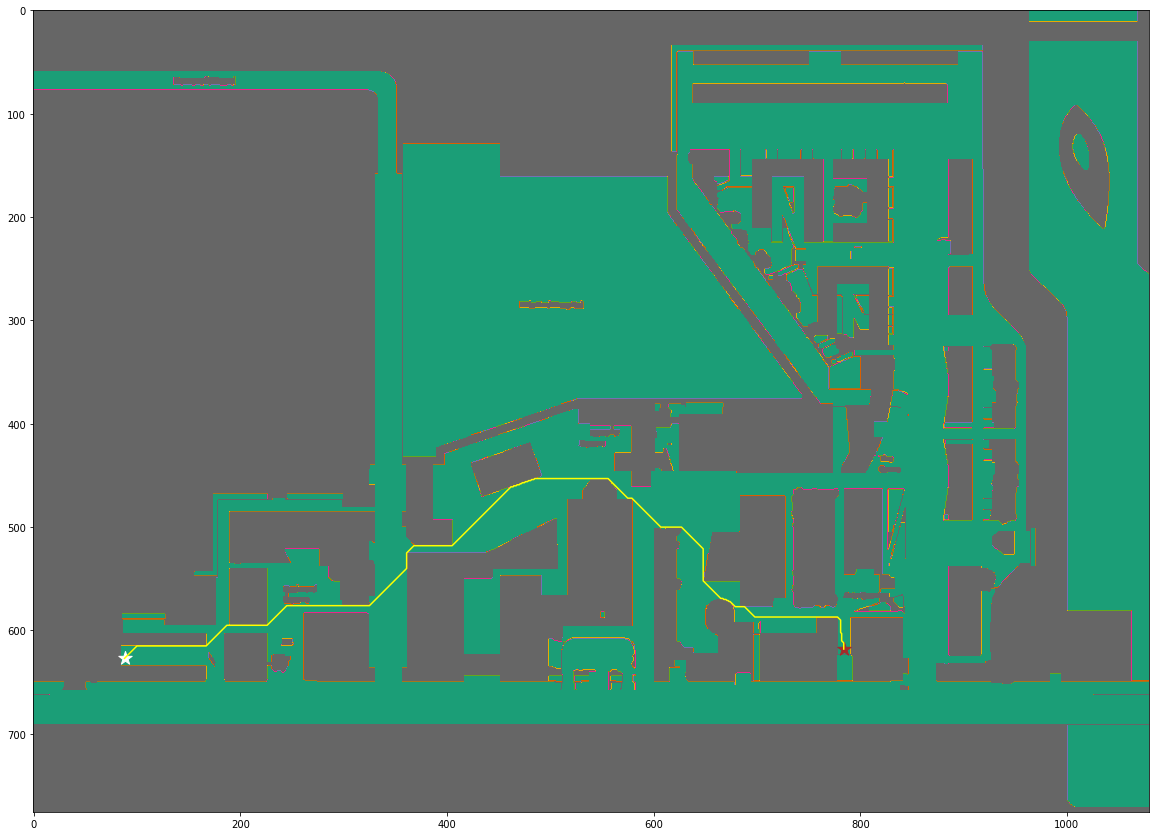

CPU times: user 19.2 s, sys: 38.3 ms, total: 19.3 s
Wall time: 19.3 s


In [ ]:
%%time
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.dijkstra import DijkstraFinder
# https://github.com/brean/python-pathfinding
grid = Grid(matrix=new_image_1)
start = grid.node(O[1],O[0])
end = grid.node(D[1],D[0])
finder = DijkstraFinder(diagonal_movement=DiagonalMovement.always)
path, runs = finder.find_path(start, end, grid)

print('operations:', runs, 'path length:', len(path))

x_coords = []

y_coords = []

for i in (range(0,len(path))):

    x = path[i][1]

    y = path[i][0]

    x_coords.append(x)

    y_coords.append(y)

# plot map and path

fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(new_image, cmap=plt.cm.Dark2)

ax.scatter(O[1],O[0], marker = "*", color = "brown", s = 200)

ax.scatter(D[1],D[0],marker = "*", color = "white", s = 200)

ax.plot(y_coords,x_coords, color = "yellow")

plt.show()

operations: 5224 path length: 1027


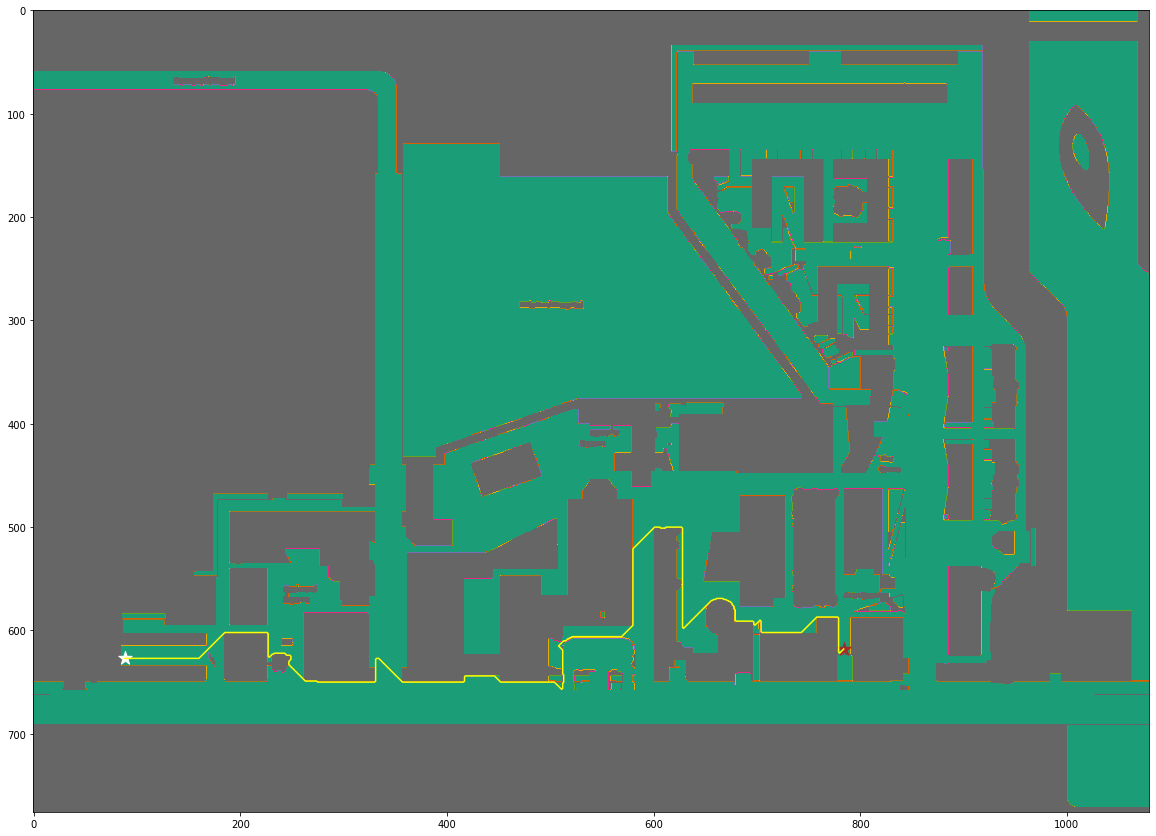

CPU times: user 4.1 s, sys: 68.2 ms, total: 4.17 s
Wall time: 4.16 s


In [ ]:
%%time
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.best_first import BestFirst
# https://github.com/brean/python-pathfinding
grid = Grid(matrix=new_image_1)
start = grid.node(O[1],O[0])
end = grid.node(D[1],D[0])
finder = BestFirst(diagonal_movement=DiagonalMovement.always)
path, runs = finder.find_path(start, end, grid)

print('operations:', runs, 'path length:', len(path))

x_coords = []

y_coords = []

for i in (range(0,len(path))):

    x = path[i][1]

    y = path[i][0]

    x_coords.append(x)

    y_coords.append(y)

# plot map and path


fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(new_image, cmap=plt.cm.Dark2)

ax.scatter(O[1],O[0], marker = "*", color = "brown", s = 200)

ax.scatter(D[1],D[0],marker = "*", color = "white", s = 200)

ax.plot(y_coords,x_coords, color = "yellow")

plt.show()

In [ ]:
nn_xy(45,700)

(38, 700)

In [ ]:
new_image[45,80]

1

In [ ]:
data_locations

In [ ]:
import json
with open('data_locations.json', 'r') as fp:
    data_locations = json.load(fp)

In [ ]:
dict_1 = {}
dict_1["66"] = [840,45]
dict_1["65"] = [700,45]
dict_1["60"] = [755,80]
dict_1["48"] = [825,340]
dict_1["52"] = [815,325]
dict_1["53"] = [815,280]
dict_1["59"] = [655,150]
dict_1["58"] = [755,180]
dict_1["57"] = [815,180]
dict_1["55"] = [895,170]
dict_1["63"] = [895,215]
dict_1["62"] = [895,225]
dict_1["55"] = [895,260]
dict_1["54"] = [895,280]
dict_1["42"] = [935,520]
dict_1["43"] = [935,480]
dict_1["45"] =  [935,420]
dict_1["50"] = [935,380]
dict_1["51"] = [935,350]
dict_1["49"] = [895,355]
dict_1["44"] = [895,455]
dict_1["1"] = [70,625]
dict_1['2'] = [125,640]
dict_1['3'] = [165,585]
dict_1["4"] = [205,625]
dict_1['5'] = [205,565]
dict_1["6"] = [205,510]
dict_1["7"] = [250,510]
dict_1["8"] = [285,510]
dict_1["10"] = [310,510]
dict_1["9"] = [310,560]
dict_1["15"] = [298,615]
dict_1["12"] = [310,450]
dict_1["11"] = [310,470]
dict_1["13"] = [368,470]
dict_1["15"] = [390,600]
dict_1["16"] = [475,600]
dict_1["18"] = [475,525]
dict_1["17"] = [440,460]
dict_1["56"] = [455,455]
dict_1["61"] = [465,440]
dict_1["19"] = [550,540]
dict_1["19a"] = [550,465]
dict_1["20"] = [550,650]
dict_1["27"] = [540,390]
dict_1["28"] = [590,410]
dict_1["26"] = [590,440]
dict_1["25"]   = [610,540]
dict_1["24"] = [610,610]
dict_1["23"] = [610,635]
dict_1["22"] = [650,630]
dict_1["34"] = [680,625]
dict_1["33"] = [665,600]
dict_1["32"] = [700,540]
dict_1["29"] = [640,435]
dict_1["31"] = [720,415]
dict_1["21"] = [590,700]
dict_1["64"] = [790,700]
dict_1["35"] = [725, 620]
dict_1["36"] = [765,620]
dict_1["37"] = [810,620]
dict_1["41"] = [810,500]
dict_1["46"] = [800,440]
dict_1["47"] = [800,410]
dict_1["39"] = [900,645]
dict_1["38"] = [870,645]
dict_1["40"] = [900,585]

In [ ]:
import json

with open('data_locations.json', 'w') as fp:
    json.dump(dict_1, fp)

In [ ]:
import json

with open('data.json') as f:
  data = json.load(f)

In [ ]:
data

In [ ]:
len(data)

In [ ]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None
# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	# if the contour has four vertices, then we have found
	# the thermostat display
  
	if len(approx) == 4:
		displayCnt = approx
		break

In [ ]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None


for c in cnts[j]:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    if len(approx) == 4:
      print(len(approx))
      displayCnt = approx
      break

In [ ]:
displayCnt

In [ ]:
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))

In [ ]:
thresh = cv2.threshold(warped, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

In [ ]:
cnts[1]

In [ ]:
for c in cnts[0]:

  (x,y,w,h) = cv2.boundingRect(c)
  print(x,y,w,h)

In [ ]:
# digit contours lists
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
digitCnts = []
# loop over the digit area candidates
for i in cnts:
  for c in i:
	# compute the bounding box of the contour
	  (x, y, w, h) = cv2.boundingRect(c)
	# if the contour is sufficiently large, it must be a digit
	  if w >= 0.5 and (h >= 0.1 and h <= 10):
		  digitCnts.append(c)

In [ ]:
digitCnts

In [ ]:
digitCnts,a = contours.sort_contours(digitCnts,
	method="left-to-right")[0]
digits = []

In [ ]:
for c in digitCnts:
  (x, y, w, h) = cv2.boundingRect(c)
  roi = thresh[y:y + h, x:x + w]
  (roiH, roiW) = roi.shape
  (dW, dH) = (int(roiW * 0.25), int(roiH * 0.15))
  dHC = int(roiH * 0.05)
  segments = [
		((0, 0), (w, dH)),	# top
		((0, 0), (dW, h // 2)),	# top-left
		((w - dW, 0), (w, h // 2)),	# top-right
		((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
		((0, h // 2), (dW, h)),	# bottom-left
		((w - dW, h // 2), (w, h)),	# bottom-right
		((0, h - dH), (w, h))	# bottom
	]
  on = [0] * len(segments)
  for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
    segROI = roi[yA:yB, xA:xB]
    total = cv2.countNonZero(segROI)
    area = (xB - xA) * (yB - yA)
    if total / float(area) > 0.5:
      on[i]= 1
  digit = DIGITS_LOOKUP[tuple(on)]
  digits.append(digit)
  cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 1)
  cv2.putText(output, str(digit), (x - 10, y - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 255, 0), 2)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
cv2_imshow(output)